In [1]:
#比特币走势预测，使用时间序列ARMA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
from itertools import product
from datetime import datetime
import  warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('D:/kaggle/bitcoin/bitcoin_2012-01-01_to_2018-10-31.csv')

In [4]:
#将时间作为df的索引
df.Timestamp=pd.to_datetime(df.Timestamp)
df.index=df.Timestamp
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,,
2011-12-31,2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119578,5.208159


In [5]:
#按照月，季度，年来统计
df_month=df.resample('M').mean()
df_Q=df.resample('Q-DEC').mean()
df_year=df.resample('A-DEC').mean()

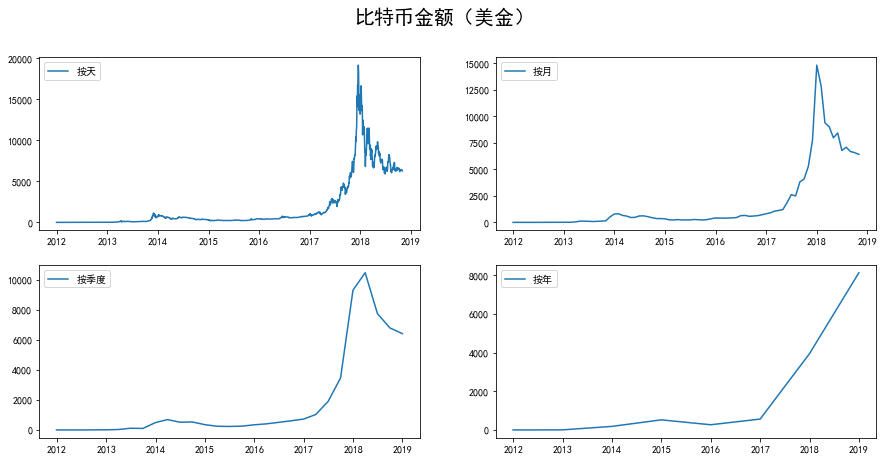

In [6]:
#按照天，月，季度，年来显示比特币的走势
fig=plt.figure(figsize=[15,7])
plt.rcParams['font.sans-serif']=['SimHei']#用来正常显示中文标签
plt.suptitle('比特币金额（美金）',fontsize=20)
plt.subplot(221)
plt.plot(df.Weighted_Price,'-',label='按天')
plt.legend()
plt.subplot(222)
plt.plot(df_month.Weighted_Price,'-',label='按月')
plt.legend()
plt.subplot(223)
plt.plot(df_Q.Weighted_Price,'-',label='按季度')
plt.legend()
plt.subplot(224)
plt.plot(df_year.Weighted_Price,'-',label='按年')
plt.legend()

In [7]:
# 设置参数范围
ps=range(0,3)
qs=range(0,3)
parameters=product(ps,qs)
parameters_list=list(parameters)

In [8]:
#寻找最优ARMA模型参数，即best_aic最小
results=[]
best_aic=float('inf')#正无穷
for param in parameters_list:
    try:
        model=ARMA(df_month.Weighted_Price,order=(param[0],param[1])).fit()
    except ValueError:
        print('参数错误：',param)
        continue
    aic=model.aic
    if aic<best_aic:
        best_model=model
        best_aic=aic
        best_param=param
    results.append([param,model.aic])

参数错误： (0, 2)


In [9]:
#输出最优模型
results_table=pd.DataFrame(results)
results_table.columns=['parameters','aic']
print('最优模型：',best_model.summary())

最优模型：                               ARMA Model Results                              
Dep. Variable:         Weighted_Price   No. Observations:                   83
Model:                     ARMA(1, 1)   Log Likelihood                -688.761
Method:                       css-mle   S.D. of innovations            957.766
Date:                Wed, 21 Aug 2019   AIC                           1385.522
Time:                        15:28:52   BIC                           1395.198
Sample:                    12-31-2011   HQIC                          1389.409
                         - 10-31-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2091.2587   1565.992      1.335      0.186    -978.028    5160.546
ar.L1.Weighted_Price     0.9251      0.042     22.045      0.000       0.843       1.007
ma.L1.

In [10]:
#比特币预测
df_month2=df_month[['Weighted_Price']]
date_list=[datetime(2018,11,30),datetime(2018,12,31),datetime(2019,1,31),datetime(2019,2,28),datetime(2019,3,31),datetime(2019,4,30),datetime(2019,5,31),datetime(2019,6,30)]
future=pd.DataFrame(index=date_list,columns=df_month.columns)
df_month2=pd.concat([df_month2,future])
df_month2['forecast']=best_model.predict(start=0,end=91)

Text(0, 0.5, '美金')

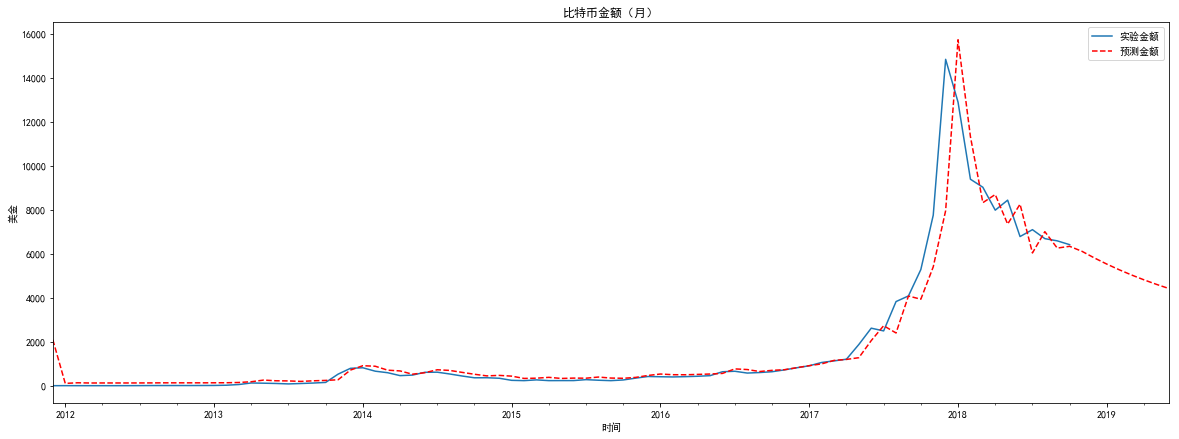

In [11]:
#比特币预测结果显示
plt.figure(figsize=(20,7))
df_month2.Weighted_Price.plot(label='实验金额')
df_month2.forecast.plot(color='r',ls='--',label='预测金额')
plt.legend()
plt.title('比特币金额（月）')
plt.xlabel('时间')
plt.ylabel('美金')